In [1]:
import os 
os.getcwd()

'C:\\Users\\Primo'

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel(r'OneDrive\Desktop\CPI_IJC_2012_2022.xlsx')

In [69]:
data.head()

,Year,Month,CPI,IJC,Period
0,2012,JAN,227.842,372000,1
1,2012,FEB,228.329,365000,1
2,2012,MAR,228.807,358000,1
3,2012,APR,229.187,372000,1
4,2012,MAY,228.713,381000,1


In [70]:
data.loc[data['Year'] < 2020, 'Period'] = 1
data.loc[data['Year'] == 2020, 'Period'] = 2
data.loc[data['Year'] > 2020, 'Period'] = 3

In [71]:
data['Period'] = data['Period'].astype(int)

In [72]:
data

,Year,Month,CPI,IJC,Period
0,2012,JAN,227.842,372000,1
1,2012,FEB,228.329,365000,1
2,2012,MAR,228.807,358000,1
3,2012,APR,229.187,372000,1
4,2012,MAY,228.713,381000,1
...,...,...,...,...,...
124,2022,MAY,291.474,202000,3
125,2022,JUN,295.328,231000,3
126,2022,JUL,295.271,248000,3
127,2022,AUG,295.620,228000,3


## Question 1

In [73]:
df_1 = data[data['Period'] == 1]
df_2 = data[data['Period'] == 2]
df_3 = data[data['Period'] == 3]

In [74]:
df_1

,Year,Month,CPI,IJC,Period
0,2012,JAN,227.842,372000,1
1,2012,FEB,228.329,365000,1
2,2012,MAR,228.807,358000,1
3,2012,APR,229.187,372000,1
4,2012,MAY,228.713,381000,1
...,...,...,...,...,...
91,2019,AUG,256.179,224000,1
92,2019,SEP,256.596,224000,1
93,2019,OCT,257.305,230000,1
94,2019,NOV,257.788,221000,1


In [52]:
df_2

,Year,Month,CPI,IJC,Period
96,2020,JAN,258.682,200000,2
97,2020,FEB,259.007,190000,2
98,2020,MAR,258.165,5946000,2
99,2020,APR,256.094,3446000,2
100,2020,MAY,255.944,1639000,2
101,2020,JUN,257.217,1446000,2
102,2020,JUL,258.543,1260000,2
103,2020,AUG,259.580,881000,2
104,2020,SEP,260.190,795000,2
105,2020,OCT,260.352,773000,2


In [53]:
df_3

,Year,Month,CPI,IJC,Period
108,2021,JAN,262.200,803000,3
109,2021,FEB,263.346,704000,3
110,2021,MAR,265.028,658000,3
111,2021,APR,266.727,574000,3
112,2021,MAY,268.599,427000,3
113,2021,JUN,270.955,405000,3
114,2021,JUL,272.184,414000,3
115,2021,AUG,273.092,381000,3
116,2021,SEP,274.214,376000,3
117,2021,OCT,276.590,280000,3


**Period 1**

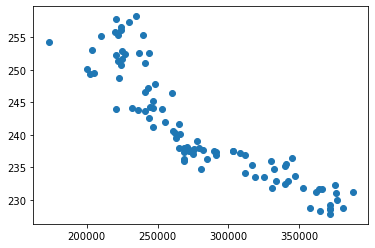

In [54]:
plt.scatter(df_1['IJC'],df_1['CPI'])
plt.show()

**Period 2**

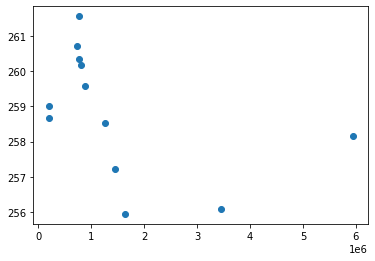

In [19]:
plt.scatter(df_2['IJC'],df_2['CPI'])
plt.show()

**Period 3**

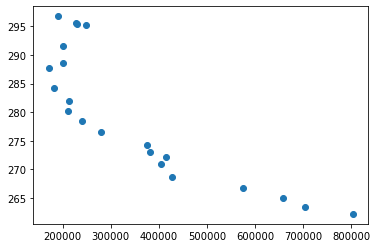

In [20]:
plt.scatter(df_3['IJC'],df_3['CPI'])
plt.show()

For the curve in period 1, we can see the obvious Phillip Curve phenomenon. However, when we enter the pandemic era which is period 2, we cannot observe the Phillip Curve anymore. For the post-pandemic era whichi is period 3, we again can observe a slight Phillip Curve trend.

## Question 2

**a**

**Full Data**

In [25]:
import numpy
from scipy.stats import chi2, f, t
def RegressionTest (xCont, yCont):
   nObs = len(yCont)
   xyCov = numpy.cov(xCont, yCont, ddof = 0)
   tDf = nObs - 2
   tStat = numpy.NaN
   tSig = numpy.NaN
   pcorr = numpy.NaN
   if (tDf > 0 and xyCov[0,0] > 0.0):
      xMean = numpy.mean(xCont)
      yMean = numpy.mean(yCont)
      regB = xyCov[0,1] / xyCov[0,0]
      if (xyCov[1,1] > 0.0):
          pcorr = xyCov[0,1] / numpy.sqrt(xyCov[0,0]) / numpy.sqrt(xyCov[1,1])
      yHat = yMean + regB * (xCont - xMean)
      residVariance = numpy.sum((yCont - yHat)**2) / tDf
      if (residVariance > 0.0):
         seB = numpy.sqrt(residVariance / (nObs * xyCov[0,0]))
         tStat = regB / seB
         tSig = 2.0 * t.sf(abs(tStat), tDf)
   outlist = [regB, seB, tStat, tDf, tSig, pcorr, numpy.power(pcorr,2)]
   return (outlist)

In [27]:
outlist = RegressionTest (data['IJC'], data['CPI'])
regB = outlist[0]
seB = outlist[1]
tStat = outlist[2]
tDf = outlist[3]
tSig = outlist[4]
pcorr = outlist[5]
pcorr_sq = outlist[6]
se_pcorr = (1 - pcorr_sq) / tDf
se_pcorr = numpy.sqrt(se_pcorr)
t_critical = t.ppf(0.975, tDf)
lower_ci = pcorr - t_critical * se_pcorr
upper_ci = pcorr + t_critical * se_pcorr
print("The Pearson Correlation is: ", pcorr)
print("The t-statistic is: ", tStat)
print("The degree of freedom is: ", tDf)
print("The significance value is: ", tSig)

The Pearson Correlation is:  0.07621826380467756
The t-statistic is:  0.8614420102228569
The degree of freedom is:  127
The significance value is:  0.3906181890358198


**b**

**Period 1**

In [28]:
outlist = RegressionTest (df_1['IJC'], df_1['CPI'])
regB = outlist[0]
seB = outlist[1]
tStat = outlist[2]
tDf = outlist[3]
tSig = outlist[4]
pcorr = outlist[5]
pcorr_sq = outlist[6]
se_pcorr = (1 - pcorr_sq) / tDf
se_pcorr = numpy.sqrt(se_pcorr)
t_critical = t.ppf(0.975, tDf)
lower_ci = pcorr - t_critical * se_pcorr
upper_ci = pcorr + t_critical * se_pcorr
print("The Pearson Correlation is: ", pcorr)
print("The t-statistic is: ", tStat)
print("The degree of freedom is: ", tDf)
print("The significance value is: ", tSig)

The Pearson Correlation is:  -0.8919248137449185
The t-statistic is:  -19.123934175531563
The degree of freedom is:  94
The significance value is:  3.6504072514365867e-34


**By the significance value, we can generally reject the null hypothesis for full data**

**c**

**Period 2**

In [32]:
outlist = RegressionTest (df_2['IJC'], df_2['CPI'])
regB = outlist[0]
seB = outlist[1]
tStat = outlist[2]
tDf = outlist[3]
tSig = outlist[4]
pcorr = outlist[5]
pcorr_sq = outlist[6]
se_pcorr = (1 - pcorr_sq) / tDf
se_pcorr = numpy.sqrt(se_pcorr)
t_critical = t.ppf(0.975, tDf)
lower_ci = pcorr - t_critical * se_pcorr
upper_ci = pcorr + t_critical * se_pcorr
print("The Pearson Correlation is: ", pcorr)
print("The t-statistic is: ", tStat)
print("The degree of freedom is: ", tDf)
print("The significance value is: ", tSig)

The Pearson Correlation is:  -0.4530967620700273
The t-statistic is:  -1.6072685389196557
The degree of freedom is:  10
The significance value is:  0.1390752122432551


**d**

**Period 3**

In [33]:
outlist = RegressionTest (df_3['IJC'], df_3['CPI'])
regB = outlist[0]
seB = outlist[1]
tStat = outlist[2]
tDf = outlist[3]
tSig = outlist[4]
pcorr = outlist[5]
pcorr_sq = outlist[6]
se_pcorr = (1 - pcorr_sq) / tDf
se_pcorr = numpy.sqrt(se_pcorr)
t_critical = t.ppf(0.975, tDf)
lower_ci = pcorr - t_critical * se_pcorr
upper_ci = pcorr + t_critical * se_pcorr
print("The Pearson Correlation is: ", pcorr)
print("The t-statistic is: ", tStat)
print("The degree of freedom is: ", tDf)
print("The significance value is: ", tSig)

The Pearson Correlation is:  -0.8457358600612068
The t-statistic is:  -6.908667315157215
The degree of freedom is:  19
The significance value is:  1.3766937216255106e-06


**By the significance value, we can generally reject the null hypothesis for full data**

## Question 3

**a**

In [80]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
import seaborn as sns

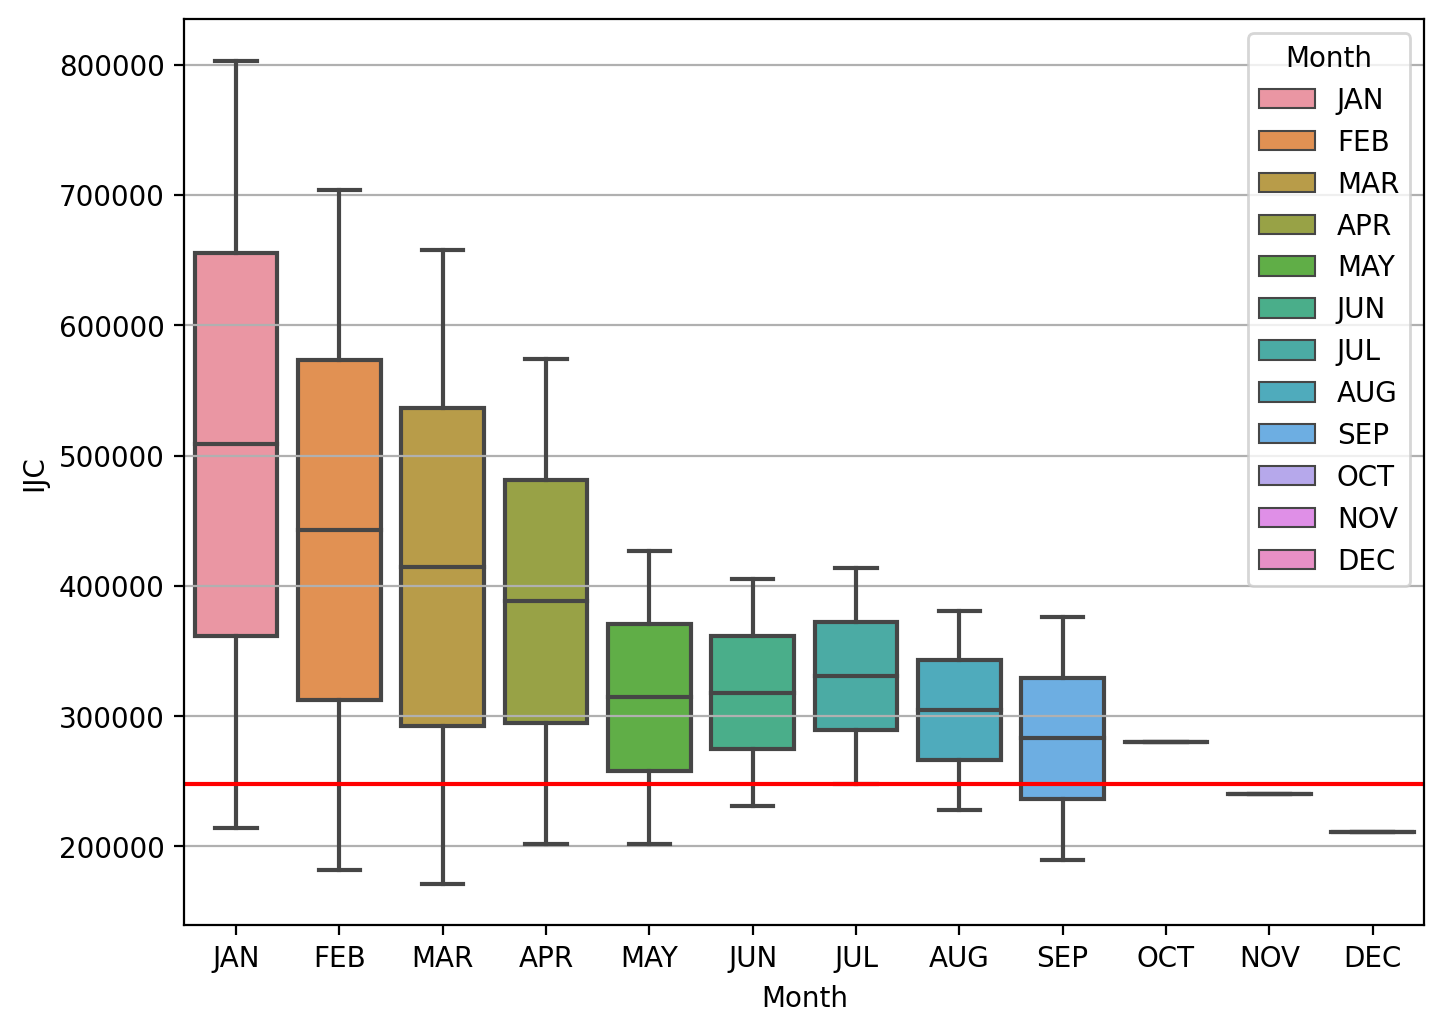

In [92]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 200)
bp = sns.boxplot(data=df_3, x="Month", y="IJC", \
            order=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], \
            hue="Month", \
            dodge=False)
plt.axhline(df_3['IJC'].median(), color='red')
ax.set_xlabel('Month')
ax.set_ylabel('IJC')
plt.title('')
plt.suptitle('')
plt.grid(axis = 'y')
plt.show()

**b**

In [125]:
df_tab = df_3.filter(items=['Month', 'IJC'])
ddf = df_tab.groupby(['Month']).describe()
cats = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
ddf.index = pd.CategoricalIndex(ddf.index, categories=cats, ordered=True)
ddf = ddf.sort_index()
ddf

IJC                                                                   \
      count      mean            std       min       25%       50%       75%   
Month                                                                          
JAN     2.0  508500.0  416485.894119  214000.0  361250.0  508500.0  655750.0   
FEB     2.0  443000.0  369109.739779  182000.0  312500.0  443000.0  573500.0   
MAR     2.0  414500.0  344361.002438  171000.0  292750.0  414500.0  536250.0   
APR     2.0  388000.0  263043.722601  202000.0  295000.0  388000.0  481000.0   
MAY     2.0  314500.0  159099.025767  202000.0  258250.0  314500.0  370750.0   
JUN     2.0  318000.0  123036.579926  231000.0  274500.0  318000.0  361500.0   
JUL     2.0  331000.0  117379.725677  248000.0  289500.0  331000.0  372500.0   
AUG     2.0  304500.0  108187.337522  228000.0  266250.0  304500.0  342750.0   
SEP     2.0  283000.0  131521.861301  190000.0  236500.0  283000.0  329500.0   
OCT     1.0  280000.0            NaN  280000.0  280000.0  280000.0  280000.0   
NOV     1.0  240000.0            NaN  240000.0  240000.0  240000.0  240000.0   
DEC     1.0  211000.0            NaN  211000.0  211000.0  211000.0  211000.0   

                 
            max  
Month            
JAN    803000.0  
FEB    704000.0  
MAR    658000.0  
APR    574000.0  
MAY    427000.0  
JUN    405000.0  
JUL    414000.0  
AUG    381000.0  
SEP    376000.0  
OCT    280000.0  
NOV    240000.0  
DEC    211000.0

**c**

In [96]:
def AnalysisOfVarianceTest (xCat, yCont):
   df = pd.DataFrame(columns = ['x', 'y'])
   df['x'] = xCat
   df['y'] = yCont
   # Total Count and Sum of Squares
   totalCount = df['y'].count()
   totalSSQ = df['y'].var(ddof = 0) * totalCount
   # Within Group Count and Sums of Squares
   groupCount = df.groupby('x').count()
   groupSSQ = df.groupby('x').var(ddof = 0) * groupCount
   nGroup = groupCount.shape[0]
   withinSSQ = numpy.sum(groupSSQ.values)
   betweenSSQ = max(0.0, (totalSSQ - withinSSQ))
   if (totalSSQ > 0.0):
      etasq = betweenSSQ / totalSSQ
   else:
      etasq = numpy.NaN
       
   # Compute F statistics
   fDf1 = (nGroup - 1)
   fDf2 = (totalCount - nGroup)
   if (fDf1 > 0 and fDf2 > 0 and withinSSQ > 0.0):
      fStat = (betweenSSQ / fDf1) / (withinSSQ / fDf2)
      fSig = f.sf(fStat, fDf1, fDf2)
   else:
      fStat = numpy.NaN
      fSig = numpy.NaN
   outlist = [nGroup, fStat, fDf1, fDf2, fSig, etasq]
   return (outlist)

In [97]:
outlist = AnalysisOfVarianceTest (df_3['Month'], df_3['IJC'])

In [98]:
etasq = outlist[5]

In [99]:
print("The ETA Squared statistics is: ", etasq)

The ETA Squared statistics is:  0.18689379134320533
